# Get example toponym distributions
In which we generate a few example distributions of toponyms to illustrate how to do toponym distribution.

In [74]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from data_helpers import load_geocorpora_data, load_simplified_geonames_data
import pandas as pd
import sys
if('..' not in sys.path):
    sys.path.append('..')
import models
from models.vae_lab.gpsvae import load_vae_from_checkpoint

## Load data

In [2]:
geocorpora = load_geocorpora_data()
geonames = load_simplified_geonames_data()

In [6]:
candidates = pd.read_csv('../../data/mined_tweets/GeoCorpora/geocorpora_names_query_results_full.tsv',
                         sep='\t', index_col=False)

## Example words

In [11]:
geocorpora.head(20)

,tweet_id_str,char_position,text,geoNameId,toponym,country_code,longitude,latitude,surrogate_geojson,uncertain_semantics,vague,overlapping_ambiguous,non_overlapping_ambiguous,not_in_geonames
feature_id,,,,,,,,,,,,,,
1,557916969433718785,10,Rivers,2324433,Rivers State,NG,6.82766,4.74974,NaN,True,NaN,NaN,NaN,NaN
2,557916969433718785,85,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
3,557916969433718785,99,Nigeria,2328926,Federal Republic of Nigeria,NG,8.00000,10.00000,NaN,NaN,NaN,NaN,NaN,NaN
4,517722122357964800,32,Alabama,4829764,Alabama,US,-86.75026,32.75041,NaN,NaN,NaN,NaN,NaN,NaN
5,489545428804055041,41,Libya,2215636,Libya,LY,17.00000,28.00000,NaN,NaN,NaN,NaN,NaN,NaN
6,560559519265456128,18,Iran,130758,Islamic Republic of Iran,IR,53.00000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
7,560559519265456128,23,Tehran,112931,Tehrān,IR,51.42151,35.69439,NaN,NaN,NaN,NaN,NaN,NaN
8,499073560959549440,107,Ferguson,4386387,Ferguson,US,-90.30539,38.74422,NaN,NaN,NaN,NaN,NaN,NaN
9,560863552152424448,34,Arizona,5551752,Arizona,US,-111.50098,34.50030,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
print(','.join(geocorpora.loc[:, 'text'].unique()[:100]))

Rivers,Nigeria,Alabama,Libya,Iran,Tehran,Ferguson,Arizona,African Region,Abingdon,Northcourt road comm. centre,England,Leipzig,Germany,Washington,US,California,Northern California,U.S.,312 MARKET ST,Ghana,derby,Bay Area,United Nations,NYC,NewYork,Japan,HK,Malaysia,Southeast Asia,Bohol,Vanuatu,Cuba,Africa,Ukraine,Hanshin,Awaji,Kuril Islands,Amman,Iraq,Gaza,USA,Lords,Atlanta,AFRICA,Lancaster,Rikers Island,Southend,Chhattisgarh,South Africa,SA,Orkney,Bots,London,UK,Iceland,Bardarbunga,Israel,Guam,Cherrystone,VA,Las Vegas,Boise,UNLV,Syria,Liberia,Sierra Leone,connecticut,Uttar Pradesh,Calgary,Oregon Trail,Flagstaff,Sunbury,America,Mansfield,New York,Middle East,Nicaragua,Clay County,PHILIPPINES,Imo,Palestine,Nauru,Cambodia,Broward County,Gambia,Imperial College,Nyaho Clinic,RALEIGH,Luzon,Philippines,Urumia,Bazar,Dallas,One Utama,KP,Azad Kashmir,Aleppo,Gun Club Rd,Santa Fe Canal


In [32]:
test_query = 'Ferguson'
test_query_gold = geocorpora[geocorpora.loc[:, 'text'] == test_query].loc[:, 'geoNameId'].values[0]

In [33]:
test_candidates = candidates[candidates.loc[:, 'query'] == test_query]
print('%d candidates'%(test_candidates.shape[0]))
print(test_candidates.head())
test_candidate_data = geonames[geonames.loc[:, 'geonames_ID'].isin(test_candidates.loc[:, 'geonames_ID'])]
test_candidate_coords = test_candidate_data.loc[:, ['latitude', 'longitude']].values

51 candidates
          query  geonames_ID   match
11380  Ferguson      4354816  approx
11381  Ferguson      4324280  approx
11382  Ferguson      4291600  approx
11383  Ferguson      1004363  approx
11384  Ferguson      8353743  approx


Let's map all the candidates.

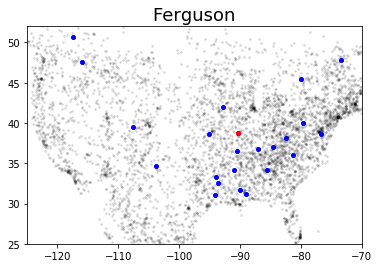

In [44]:
pd.np.random.seed(123)
sample_size = 25000
geo_sample = geonames.loc[pd.np.random.choice(geonames.index, size=sample_size, replace=False)].loc[:, ['latitude', 'longitude']].values
# world
# x_bounds = [-150, 160]
# y_bounds = [-60, 75]
# USA
x_bounds = [-125, -70]
y_bounds = [25, 52]
gold_candidate_data = test_candidate_data[test_candidate_data.loc[:, 'geonames_ID'] == test_query_gold]
plt.scatter(geo_sample[:, 1], geo_sample[:, 0], marker='o', s=3, color='black', alpha=0.1)
plt.scatter(test_candidate_coords[:, 1], test_candidate_coords[:, 0], marker='o', s=16, color='blue')
plt.scatter(gold_candidate_data.loc[:, ['longitude']], gold_candidate_data.loc[:, ['latitude']], marker='o', s=16, color='red')
# plot the gold one differently
plt.title(test_query, size=18)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.show()

Same thing but with probability distribution as shading.

In [50]:
# geo_vae = load_vae_from_checkpoint('../models/vae_lab/GeoNames_checkpoints/GeoNames_h45_z10_enc3_dec8_kld0.020_batch1_sample0.0100_epochs300/best.checkpoint')
vae_scores = pd.read_csv('../models/vae_lab/scores/GeoNames_h45_z10_enc3_dec8_kld0.020_batch1_sample0.0100_epochs300_geonames_scores.tsv',
                         sep='\t', index_col=False)

In [51]:
vae_scores.head()

,geonames_ID,VAE_prob,query
0,2986043,-10.673362,Pic de Font Blanca
1,2994701,-9.913706,Roc Mélé
2,3007683,-11.247735,Pic des Langounelles
3,3017832,-10.366459,Pic de les Abelletes
4,3017833,-9.180025,Estany de les Abelletes


In [81]:
candidate_scores = vae_scores[vae_scores.loc[:, 'geonames_ID'].isin(test_candidate_data.loc[:, 'geonames_ID'])].loc[:, ['geonames_ID', 'VAE_prob']]
# normalize VAE prob
score_sum = candidate_scores.loc[:, 'VAE_prob'].apply(pd.np.exp).sum()
candidate_scores.loc[:, 'VAE_prob'] = candidate_scores.loc[:, 'VAE_prob'].apply(lambda x: pd.np.exp(x) / score_sum)
print('%d candidate scores'%(candidate_scores.shape[0]))

28 candidate scores


In [82]:
score_sum

0.0092187774698938418

In [83]:
candidate_scores.head()

,geonames_ID,VAE_prob
343017,2166787,1.781955e-06
407812,8353743,7.789981e-07
952271,5952203,1.243653e-04
952272,5952204,4.028481e-04
952273,5952205,2.959036e-04


In [84]:
candidate_scores = pd.merge(candidate_scores, geonames.loc[:, ['geonames_ID', 'latitude', 'longitude']],
                            on='geonames_ID', how='inner')

In [97]:
candidate_scores.sort_values('VAE_prob', inplace=False, ascending=False).head(10)

,geonames_ID,VAE_prob,latitude,longitude
6,4061668,0.907659,34.13899,-85.59079
15,4386397,0.025760,36.50950,-90.51289
11,4291600,0.012803,37.06674,-84.59994
17,4426296,0.011613,31.63239,-90.08175
7,4110537,0.011523,34.13816,-90.98400
21,4805708,0.006592,38.07565,-82.43321
8,4110545,0.005726,33.33290,-93.95324
16,4426274,0.004093,31.19407,-88.97560
10,4291599,0.002885,36.77948,-86.97722
12,4324280,0.001468,32.55071,-93.67546


In [98]:
candidate_scores[candidate_scores.loc[:, 'geonames_ID']==test_query_gold]

,geonames_ID,VAE_prob,latitude,longitude
14,4386387,0.000751,38.74422,-90.30539


In [87]:
cmap = cm.get_cmap('Blues')

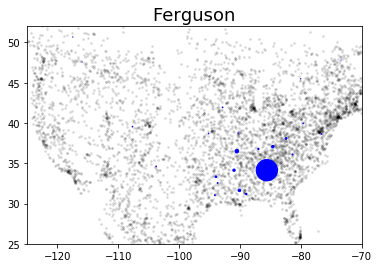

In [95]:
plt.scatter(geo_sample[:, 1], geo_sample[:, 0], marker='o', s=3, color='black', alpha=0.1)
plt.scatter(candidate_scores.loc[:, 'longitude'], 
            candidate_scores.loc[:, 'latitude'], 
#             c=candidate_scores.loc[:, 'VAE_prob'],
            marker='o', s=candidate_scores.loc[:, 'VAE_prob']*500,
            color='blue')
#             cmap=cmap)
plt.title(test_query, size=18)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.show()

Not a great example because the gold toponym is not the one with the highest probability...awkward.

## Try multiple test cases

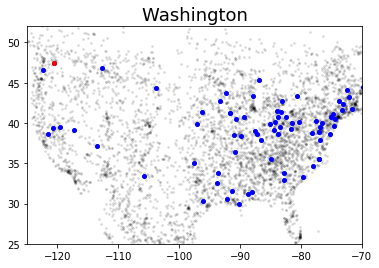

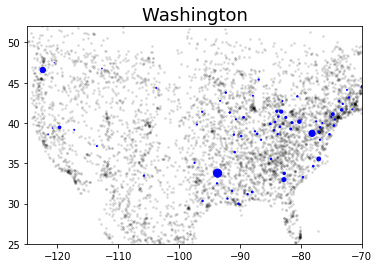

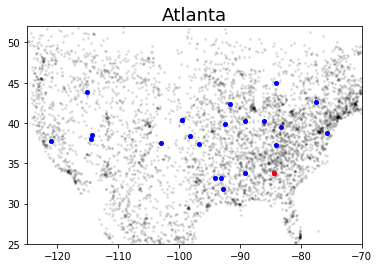

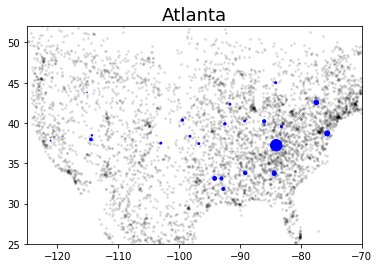

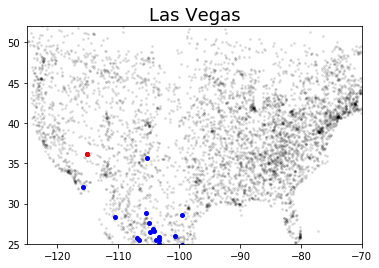

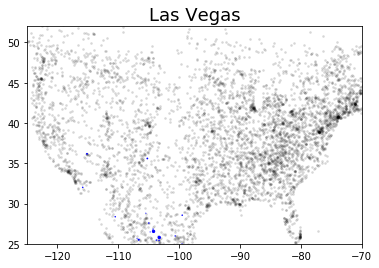

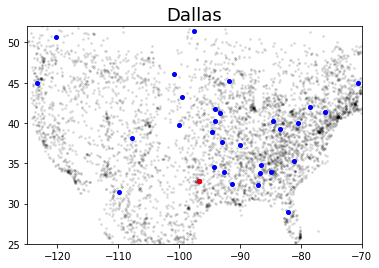

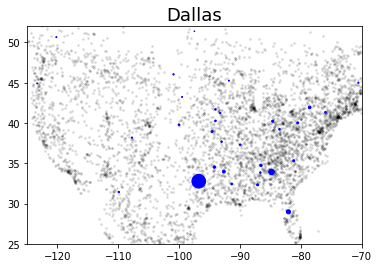

In [109]:
test_queries = ['Washington', 'Atlanta', 'Las Vegas', 'Dallas']
for q in test_queries:
    test_candidates = candidates[candidates.loc[:, 'query'] == q]
    test_candidate_data = geonames[geonames.loc[:, 'geonames_ID'].isin(test_candidates.loc[:, 'geonames_ID'])]
    test_candidate_coords = test_candidate_data.loc[:, ['latitude', 'longitude']].values
    q_gold = geocorpora[geocorpora.loc[:, 'text'] == q].loc[:, 'geoNameId'].values[0]
    x_bounds = [-125, -70]
    y_bounds = [25, 52]
    gold_candidate_data = test_candidate_data[test_candidate_data.loc[:, 'geonames_ID'] == q_gold]
    ## plot normal distribution
    plt.scatter(geo_sample[:, 1], geo_sample[:, 0], marker='o', s=3, color='black', alpha=0.1)
    plt.scatter(test_candidate_coords[:, 1], test_candidate_coords[:, 0], marker='o', s=16, color='blue')
    plt.scatter(gold_candidate_data.loc[:, ['longitude']], gold_candidate_data.loc[:, ['latitude']], marker='o', s=16, color='red')
    plt.title(q, size=18)
    plt.xlim(x_bounds)
    plt.ylim(y_bounds)
    plt.show()
    ## plot prob distribution
    candidate_scores = vae_scores[vae_scores.loc[:, 'geonames_ID'].isin(test_candidate_data.loc[:, 'geonames_ID'])].loc[:, ['geonames_ID', 'VAE_prob']]
    # normalize VAE prob
    score_sum = candidate_scores.loc[:, 'VAE_prob'].apply(pd.np.exp).sum()
    candidate_scores.loc[:, 'VAE_prob'] = candidate_scores.loc[:, 'VAE_prob'].apply(lambda x: pd.np.exp(x) / score_sum)
    candidate_scores = pd.merge(candidate_scores, geonames.loc[:, ['geonames_ID', 'latitude', 'longitude']],
                                on='geonames_ID', how='inner')
    plt.scatter(geo_sample[:, 1], geo_sample[:, 0], marker='o', s=3, color='black', alpha=0.1)
    plt.scatter(candidate_scores.loc[:, 'longitude'], 
                candidate_scores.loc[:, 'latitude'], 
    #             c=candidate_scores.loc[:, 'VAE_prob'],
                marker='o', s=candidate_scores.loc[:, 'VAE_prob']*500,
                color='blue')
    #             cmap=cmap)
    plt.title(q, size=18)
    plt.xlim(x_bounds)
    plt.ylim(y_bounds)
    plt.show()

Dallas is a good example! Let's do that one.

Let's plot it using Basemap ~for consistency~.

In [110]:
from mpl_toolkits.basemap import Basemap

In [250]:
def plot_candidate_probs(geo_map, query, candidate_data, geonames_data, 
                         probs, prob_var, x_bounds, y_bounds, 
                         cmap=cm.Blues, log_scale=True):
    test_candidates = candidate_data[candidate_data.loc[:, 'query'] == query]
    test_candidate_data = geonames_data[geonames_data.loc[:, 'geonames_ID'].isin(test_candidates.loc[:, 'geonames_ID'])]
    # restrict to bounded candidates
    test_candidate_data = test_candidate_data[(test_candidate_data.loc[:, 'longitude'] >= x_bounds[0]) &
                                              (test_candidate_data.loc[:, 'longitude'] <= x_bounds[1]) &
                                              (test_candidate_data.loc[:, 'latitude'] >= y_bounds[0]) &
                                              (test_candidate_data.loc[:, 'latitude'] <= y_bounds[1])]
    test_candidate_data = pd.merge(test_candidate_data, probs.loc[:, ['geonames_ID', prob_var]],
                                   on='geonames_ID', how='inner')
    # sort by value
    test_candidate_data.sort_values(prob_var, inplace=True, ascending=True)
    candidate_probs = test_candidate_data.loc[:, prob_var]
    
    # rescale
    if(log_scale):
        candidate_probs = pd.np.log10(abs(candidate_probs))
    candidate_probs = candidate_probs.values
    x = test_candidate_data.loc[:, 'longitude'].values
    y = test_candidate_data.loc[:, 'latitude'].values
    x, y = geo_map(x, y)
    geo_map.scatter(x, y, 
                    c=candidate_probs,
                    marker='o',
                    edgecolor='k',
                    linewidth=0.5,
                    s=86,
                    cmap=cmap, zorder=3)
    cb = geo_map.colorbar(location='bottom')
    cb.ax.tick_params(labelsize=28)
    cb.set_label(label='P(Y)', fontsize=42)
    plt.title(query, size=56)
    plt.show()

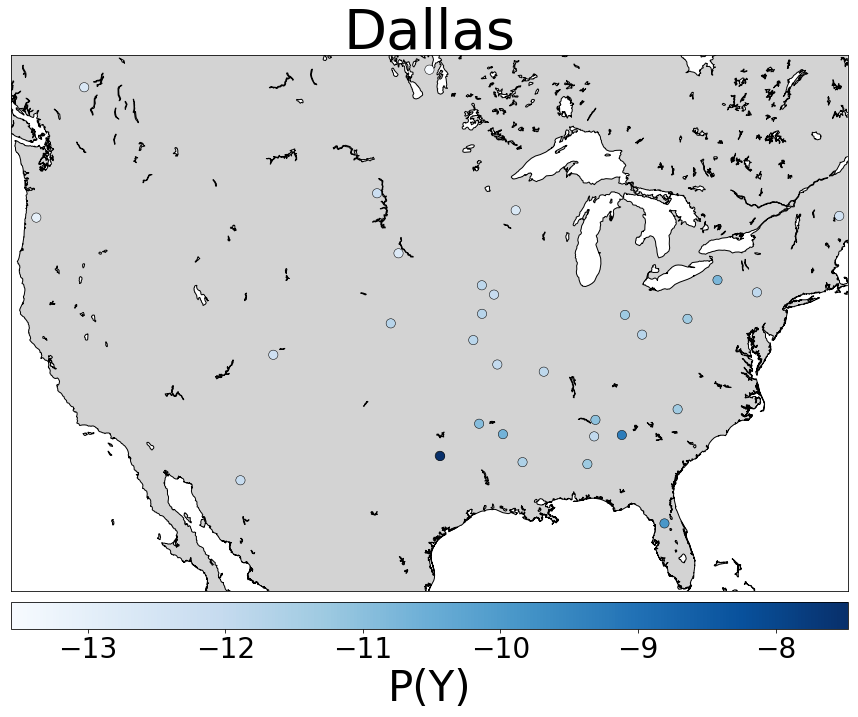

In [251]:
geo_map = Basemap(projection='merc', resolution='i', 
                  llcrnrlon=x_bounds[0], urcrnrlon=x_bounds[1], 
                  llcrnrlat=y_bounds[0], urcrnrlat=y_bounds[1])
plt.figure(figsize=(15,20))
geo_map.drawcoastlines()
geo_map.fillcontinents(color='lightgray', zorder=0)
# rescale map bounds
query = 'Dallas'
plot_candidate_probs(geo_map, query, candidates, geonames, vae_scores, 'VAE_prob', x_bounds, y_bounds, log_scale=False)